['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']
Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


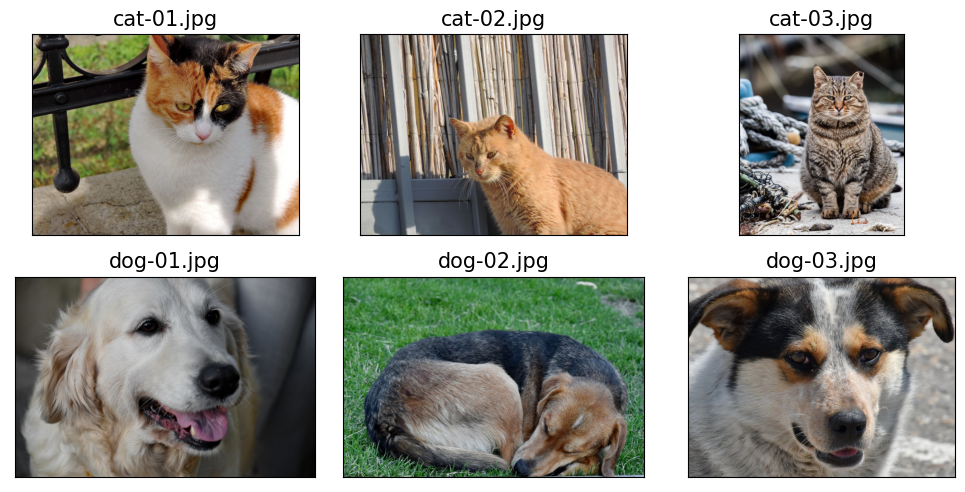

In [1]:
import sklearn
import pathlib, os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset

os.environ['KMP_DUPLICATE_LIB_OK']='True'
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

fig = plt.figure(figsize = (10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size = 15)
plt.tight_layout()
plt.show()
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)
class ImageDataset:
    def __init__(self, file_list, labels, transform = None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        return img, self.labels[index]
    def __len__(self):
        return len(self.labels)
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width))])
image_dataset = ImageDataset(file_list, labels, transform=transform)
fig = plt.figure(figsize = (10, 6))
for i, img_dual in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img_dual[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{img_dual[1]}', size = 15)

[0, 0, 0, 1, 1, 1]
